In [1]:
import pandas as pd
import numpy as np
import sympy
from sympy.solvers.inequalities import reduce_rational_inequalities,reduce_inequalities
from itertools import chain
from collections import defaultdict
from IPython.display import display

from sympy.parsing.sympy_parser import parse_expr
from sympy.parsing.sympy_parser import standard_transformations
from sympy.printing.mathml import print_mathml
import math
from IPython.display import display, Markdown, Latex
import os
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

def make_symbols_positive(sym):
    return sympy.symbols("{}".format(sym),positive =True)

def make_symbols_function(sym):
    return sympy.symbols("{}".format(sym),cl)

def subs_function(target,list_):
    return sympy.simplify(target.subs(list_))

def root_cal(value):
    return value**(1/2)

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello World !' + color.END)

Hello World !


# w_range

In [3]:
def sol_w_same(df_1,target_):
    w_sol = sympy.solve([df_1["QD"][target_]-df_1["FB"][target_]],w)
    return w_sol

In [4]:
def sol_w_other(df_1,equa):
    w_sol = sympy.solve(equa,w)
    return w_sol

In [5]:
def display_solve(df_1,w_sol):
    for row,col in df_1.iterrows():
        print(row)
        try:
            display(col["QD"].subs([(w,w_sol)]).factor())
        except:
            print()
        print()

In [6]:
def display_solve2(df_1,w_sol):
    for row,col in df_1.iterrows():
        print(row)
        try:
            display(col["QD"].subs([(w,w_sol)]).simplify())
        except:
            print()
        print()

In [7]:
def display_w_insert(df_,w_1):
    order_ = ["w","epsilon","t","p","q_nd","q_t","q","profit_r","profit_s","profit_all","h1_r_p","h1_s_w","h1_s_e"]
    if w_1 == "WH":
        for ord_ in order_:
            try:
                value_ = df_[1][ord_].factor()
                value_2 = df_[1][ord_].simplify()
                print(color.RED + ord_ + color.END)
                display("factor: ",value_)
                display("simplify: ",value_2)
                print("-"*40)
            except:
                print(color.RED + ord_ + color.END)
                print("-"*40)
    else:
        for ord_ in order_:
            try:
                value_ = df_[1][ord_].subs([(w,w_1)]).factor()
                value_2 = df_[1][ord_].subs([(w,w_1)]).simplify()
                print(color.RED + ord_ + color.END)
                display("factor: ",value_)
                display("simplify: ",value_2)
                print("-"*40)
            except:
                print(color.RED + ord_ + color.END)
                print("-"*40)

In [9]:
Path_ = r"C:\Users\Samsung\jupyter\Graduation_thesis\result\version_un_4"

In [10]:
file_list = os.listdir(Path_)
file_list_xlsx = [f for f in file_list if f.endswith(".xlsx")]
#file_FB = [f for f in file_list_xlsx if f.contains("FB")]
#file_WH = [f for f in file_list_xlsx if f.contains("WH")]
#file_QD = [f for f in file_list_xlsx if f.contains("QD")]

In [11]:
file_name = [li.replace(".xlsx","") for li in file_list_xlsx]
file_name

['ND_FB',
 'ND_QD',
 'ND_WH',
 'UN_BD_QD',
 'UN_BD_WH',
 'UN_BS_QD',
 'UN_BS_WH',
 'UN_DD_QD',
 'UN_DD_WH',
 'UN_SD_QD',
 'UN_SD_WH']

In [12]:
for fn in file_name:
    path_ = Path_ + "\\{}.xlsx"
    globals() ["{}".format(fn)] = pd.read_excel(path_.format(fn),index_col=0,header=None)
    try:
        globals() ["{}".format(fn)] = globals() ["{}".format(fn)]#.rename(index={"profit_all":"pro_all"})
    except:
        pass

In [13]:
p,w,c,s,alpha,beta,delta_d,delta_s,epsilon,psi = make_symbols_positive("p,w,c,s,alpha,beta,delta_d,delta_s,epsilon,psi")

In [14]:
parse_dic = {"p":p,"w":w,"c":c,"s":s
             ,"alpha":alpha,"beta":beta
             ,"delta_d":delta_d,"delta_s":delta_s,"epsilon":epsilon }

In [15]:
for fn in file_name:
    globals() ["{}".format(fn)][1] = globals() ["{}".format(fn)][1].map(lambda x: parse_expr(x.replace("^","**").replace("lambda","lambda_"),parse_dic))

# Un cases

In [16]:
solve_ws = sympy.solve((ND_QD[1]["profit_s"]-ND_WH[1]["profit_s"]).factor(),w)
w_w = solve_ws[1]
w_w

(-alpha + 2*beta*c + sqrt(2)*(alpha - beta*c))/beta

In [17]:
solve_w = sympy.solve((ND_QD[1]["profit_all"]-ND_FB[1]["profit_all"]).factor(),w)
w_c = solve_w[0]
w_c

alpha/beta

In [18]:

tar_wh = ND_WH.copy()
tar_qd = ND_QD.copy()

ND_QDW = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor())) 
ND_QDC = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor())) 


In [19]:
time_ = "UN"
dis_ = "DD"


tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]

globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  
time_ = "UN"
diss_ = ["DD","SD","BD","BS"]

for dis_ in diss_:
    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]
    globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
    globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  

In [20]:
time_ = "UN"
dis_ = "SD"


tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]

globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  
time_ = "UN"
diss_ = ["DD","SD","BD","BS"]

for dis_ in diss_:
    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]
    globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
    globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  


In [21]:
time_ = "UN"
dis_ = "BD"


tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]

globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  
time_ = "UN"
diss_ = ["DD","SD","BD","BS"]

for dis_ in diss_:
    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]
    globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
    globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  


In [22]:
time_ = "UN"
dis_ = "BS"


tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]

globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  
time_ = "UN"
diss_ = ["DD","SD","BD","BS"]

for dis_ in diss_:
    tar_wh = globals() ["{}_{}_WH".format(time_,dis_)]
    tar_qd = globals() ["{}_{}_QD".format(time_,dis_)]
    globals() ["{}_{}_QD{}".format(time_,dis_,"W")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_w)]).factor()))  
    globals() ["{}_{}_QD{}".format(time_,dis_,"C")] = pd.DataFrame(tar_qd[1].map(lambda x : x.subs([(w,w_c)]).factor()))  


In [23]:
def hessian_(df_,para_):
    try:
        try:
            a_ = float(df_[1]["h1_r_p"].subs(para_))
            b_ = float(df_[1]["h1_s_w"].subs(para_))
            if a_ and b_ <= 0:
                return "NONE"
            else:
                return "STOP"
        except:
            a_ = float(df_[1]["h1_r_p"].subs(para_))
            b_ = float(df_[1]["h1_s_w"].subs(para_))
            c_ = float(df_[1]["h1_s_e"].subs(para_))
            if a_ and b_ and c_ <= 0:
                return "NONE"
            else:
                return "STOP"
    except:
        return "NONE"

In [24]:
def subs_lambda(y,params):
    try:
        out_ = y.subs(params)
        try:
            out_ = round(float(out_),3)
        except:
            pass
    except:
        out_ = 0
    return out_

In [25]:
def apply_num(df,para_list):
    return df.apply(lambda x : x.map(lambda y: subs_lambda(y,para_list)))

In [26]:
file_name_2 = ['ND_FB',
 'ND_QDC',
 'ND_QDW',
 'ND_WH',
 'UN_BD_QDC',
 'UN_BD_QDW',
 'UN_BD_WH',
 'UN_BS_QDC',
 'UN_BS_QDW',
 'UN_BS_WH',
 'UN_DD_QDC',
 'UN_DD_QDW',
 'UN_DD_WH',
 'UN_SD_QDC',
 'UN_SD_QDW',
 'UN_SD_WH']

In [78]:
##DD
# -c< s < alpha / beta

In [211]:
wh_ = UN_DD_WH.copy()
qdw_ = UN_DD_QDW.copy()
qdc_ = UN_DD_QDC.copy()

tar_ = "profit_r"


In [212]:
a_ = (qdw_[1][tar_]-wh_[1][tar_]).factor()
a_

(-alpha + beta*c)*(-5*alpha*delta_d + 4*sqrt(2)*alpha*delta_d - 4*sqrt(2)*alpha + 5*alpha + beta*c*delta_d - 5*beta*c + 4*sqrt(2)*beta*c - 4*beta*delta_d*s + 4*sqrt(2)*beta*delta_d*s)/(16*beta)

In [213]:
b_ = (qdw_[1][tar_]-qdc_[1][tar_]).factor()
b_

(-alpha + beta*c)*(-3*alpha*delta_d + 2*sqrt(2)*alpha*delta_d - 2*sqrt(2)*alpha + 2*alpha - beta*c*delta_d - 2*beta*c + 2*sqrt(2)*beta*c - 4*beta*delta_d*s + 2*sqrt(2)*beta*delta_d*s)/(8*beta)

In [214]:
c_ = (wh_[1][tar_]-qdc_[1][tar_]).factor()
c_

-(-alpha + beta*c)*(alpha*delta_d + alpha + 3*beta*c*delta_d - beta*c + 4*beta*delta_d*s)/(16*beta)

In [ ]:
wh_ = UN_DD_WH.copy()
qdw_ = UN_DD_QDW.copy()
qdc_ = UN_DD_QDC.copy()

tar_ = "profit_r"

In [215]:
Para_ = [(alpha,1200),(beta,7),(c,50)]
up_ = 1200/7
down_ = -50

a_ = (qdw_[1][tar_]-wh_[1][tar_]).factor()
b_ = (qdw_[1][tar_]-qdc_[1][tar_]).factor()
c_ = (wh_[1][tar_]-qdc_[1][tar_]).factor()

del_range = np.arange(0,1.01,0.05)
s_range = np.arange(down_,up_,1)

In [200]:
del_range

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [201]:
def check_sign(a_c):
    if a_c >= 0:
        return "Positive"
    else:
        return "Negative"

In [204]:
def make_df(del_range,s_range,a_,name):
    all_ =  []
    root_ = tqdm(del_range)
    for del_ in root_:
        n_d, n_s = del_,del_
        i = 0
        for s_ in s_range:
            try:
                para_ = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s),(s,s_)]
                value_ = a_.subs(para_)

                i += 1

                s_2 = s_range[i]
                para_2 = [(alpha,1200),(beta,7),(c,50),(delta_d,n_d),(delta_s,n_s),(s,s_2)]
                value_2 = a_.subs(para_2)

                sign_1 = check_sign(value_)
                sign_2 = check_sign(value_2)

                if sign_1 != sign_2:
                    all_can = [del_,s_]
                    all_.append(all_can)


                else:
                    pass
            except:
                pass
    return pd.DataFrame(all_).rename(columns={0:"delta_",1:name}).set_index("delta_")#.plot()

In [205]:
all_1 = make_df(del_range,s_range,a_,"a")
all_1

  0%|          | 0/21 [00:00<?, ?it/s]

,a
delta_,
0.20,142.0
0.25,94.0
0.30,62.0
0.35,39.0
0.40,22.0
0.45,8.0
0.50,-2.0
0.55,-11.0
0.60,-18.0


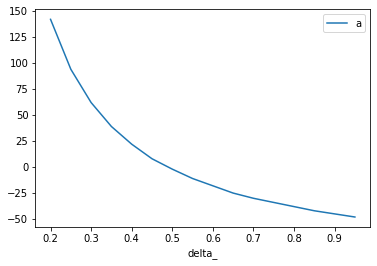

In [206]:
all_1.plot()

In [216]:
all_1.to_excel(r"C:\Users\Samsung\jupyter\Graduation_thesis\result\graph_\sense\UN_DD_pir.xlsx")

In [217]:
wh_ = UN_DD_WH.copy()
qdw_ = UN_DD_QDW.copy()
qdc_ = UN_DD_QDC.copy()

tar_ = "profit_all"

In [218]:
Para_ = [(alpha,1200),(beta,7),(c,50)]
up_ = 1200/7
down_ = -50

a_ = (qdw_[1][tar_]-wh_[1][tar_]).factor()
b_ = (qdw_[1][tar_]-qdc_[1][tar_]).factor()
c_ = (wh_[1][tar_]-qdc_[1][tar_]).factor()

del_range = np.arange(0,1.01,0.05)
s_range = np.arange(down_,up_,1)

  0%|          | 0/21 [00:00<?, ?it/s]

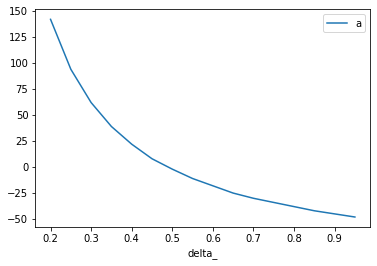

In [219]:
all_1 = make_df(del_range,s_range,a_,"a")
all_1.plot()

  0%|          | 0/21 [00:00<?, ?it/s]

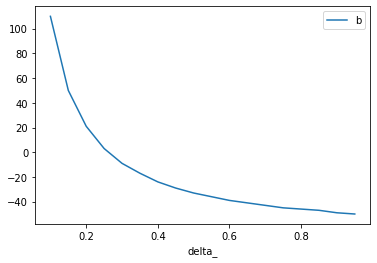

In [220]:
all_2 = make_df(del_range,s_range,b_,"b")
all_2.plot()

In [221]:
all_2

,b
delta_,
0.10,110.0
0.15,50.0
0.20,21.0
0.25,3.0
0.30,-9.0
0.35,-17.0
0.40,-24.0
0.45,-29.0
0.50,-33.0


# alpha, c

In [ ]:
Para_ = [(alpha,1200),(beta,7),(c,50)]
up_ = 1200/7
down_ = -50

a_ = (qdw_[1][tar_]-wh_[1][tar_]).factor()
b_ = (qdw_[1][tar_]-qdc_[1][tar_]).factor()
c_ = (wh_[1][tar_]-qdc_[1][tar_]).factor()

del_range = np.arange(0,1.01,0.05)
s_range = np.arange(down_,up_,1)

In [265]:
alpha_range = np.arange(800,850,0.1)
c_range = np.arange(0,10,00.1)

In [266]:
c_range

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [267]:
def make_df2(alpha_range,c_range,a_,name):
    all_ =  []
    root_ = tqdm(alpha_range)
    for alpha_1 in root_:
        i = 0
        for c_ in c_range:
            try:
                para_ = [(alpha,alpha_1),(beta,7),(c,c_),(delta_d,0.4),(delta_s,0.4),(s,50)]
                value_ = a_.subs(para_)

                i += 1

                c_2 = c_range[i]
                para_ = [(alpha,alpha_1),(beta,7),(c,c_2),(delta_d,0.4),(delta_s,0.4),(s,50)]
                value_2 = a_.subs(para_2)

                sign_1 = check_sign(value_)
                sign_2 = check_sign(value_2)

                if sign_1 != sign_2:
                    all_can = [alpha_1,c_]

                    all_.append(all_can)


                else:
                    pass
            except:
                pass
    return pd.DataFrame(all_).rename(columns={0:"alpha",1:name})#.set_index(name)#.plot()

In [268]:
all_3 = make_df2(alpha_range,c_range,a_,"a_")

  0%|          | 0/500 [00:00<?, ?it/s]

In [264]:
all_3.set_index("alpha")

,a_
alpha,
800,0
800,1
800,2
800,3
800,4
...,...
1240,30
1240,31
1240,32


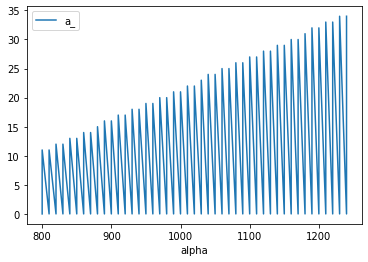

In [263]:
all_3.set_index("alpha").plot()

In [ ]:
all_3 = make_df2(alpha_range,c_range,b_,"b_")

  0%|          | 0/500 [00:00<?, ?it/s]